# Existing Code

# To Do List
0. Can have unlimited number of positions?
1. Min. Number of Bars before can place another trade 


2. After open a position after 5 bars if not profitable, set 10 pip profit? To take advantage of 1 min bars?
3. Minimum number of bars before can place another trade.
4. Max 3 buys Or sell?
5. If short and next close is higher, Init pip TP.
6. Can cTrader COPY.

# DONE
1. Check if **Ideal Lot**
  - Drawdown per Lot = $600
  - Target Lot = 3
2. Disable Shorting?
  - Unprofitable because Stable pairs dont depreciate like stocks. So they fluctuate.

# Findings (Theoretical)
1. **Do not have Stop losses.** Stop losses defined by PMAR. (Rationale: Stable pairs do not go one way down, say 7 weeks later will still come up. **Play by numbers**
2. Set Take profits


## Script:
1.  **Purple Arrow** - Mention and "strategy.position_size == 0 " ? 


### Lesson 1 (Flash Crash)
1. Set Buy or Sell in case of spike down suddenly flash crash and triggers Buy Limit As Shown Below
 - what happened: Anyhow set Buy Order, At time T, suddenly Flash crash down. Triggering Purchase at time (t).
 - All of a sudden, Profit + 100+ 
 - then later, i set 3 lot buy limit to purchase if another flash Crash.
 - Moral of Story, set Buy Limits 
 - **What happaned on that bar**, Continued pushing down , big candle Stick, For that bar
 

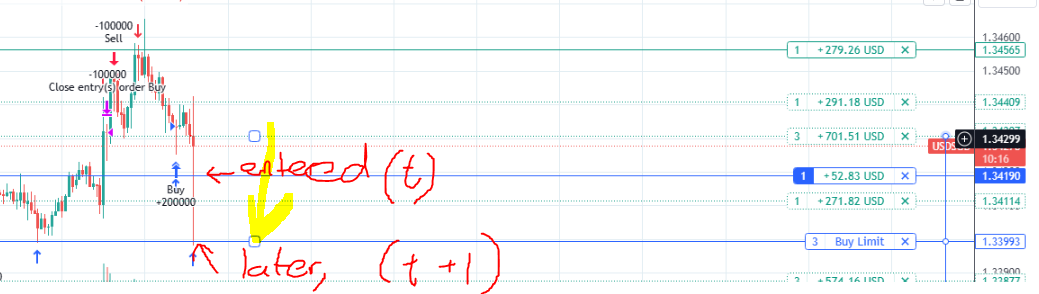

### Section 0:
0. Can have unlimited number of positions?


In [ ]:
///////////////////////////////////////////////////////////////////////////////
///
// @version=5
//
// This source code is subject to the terms of the Mozilla Public License 2.0 at https://mozilla.org/MPL/2.0/
// @author = The_Caretaker
// © The_Caretaker
//
// Much respect to Eric Crown for this idea.
// 
// Feel free to reuse or develop this script further, please drop me a note below if you find it useful.
//
///////////////////////////////////////////////////////////////////////////////

strategy ( '1_PMAR', '1_PMAR&P', overlay = false , title="Source")

// len = input(20, title="Length")
// src = input(close, title="Source")

///////////////////////////////////////////////////////////////////////////////
// Input default variable declarations

var string s_pmarp = 'Price Moving Average Ratio Percentile'
var string s_pmar  = 'Price Moving Average Ratio'
var string s_BGR   = 'Blue Green Red'
var string s_BR    = 'Blue Red'

var float pmarHigh = 1.0
var float pmarLow  = 1.0

///////////////////////////////////////////////////////////////////////////////
// Inputs

i_src_price         = input.source  ( close,        'Price source',                                                                         inline='1',     group='Main Properties')
i_p_type_line       = input.string  ( s_pmarp,      'Indicator',                options=[ s_pmar, s_pmarp ],                                inline='2',     group='Main Properties')

i_ma_len            = input.int     ( 20,           'PMAR length',              minval=1,                                                   inline='3',     group='Main Properties')
i_ma_typ            = input.string  ( 'VWMA',       'MA type',                  options=[ 'SMA', 'EMA', 'HMA', 'RMA', 'VWMA' ],             inline='3',     group='Main Properties')

i_c_typ_line        = input.string  ( 'Spectrum',   'Color type',               options=[ 'Spectrum', 'Solid' ],                            inline='1',     group='Line plot settings')
i_c_typ_spctrm_line = input.string  ( s_BGR,        'Spectrum',                 options=[ s_BR, s_BGR ],                                    inline='1',     group='Line plot settings')
i_c_solid_line      = input.color   ( #FFFF00,    'Solid color',                                                                          inline='1',     group='Line plot settings')
i_p_width_line      = input.int     ( 1,            'Line width',               minval=1, maxval=4,                                         inline='2',     group='Line plot settings')
i_pmarp_lookback    = input.int     ( 350,          'Lookback',                 minval=1, maxval=1900,                                      inline='2',     group='Line plot settings')

i_show_signal_ma    = input.bool    ( true,         'Signal MA',                                                                            inline='0',     group='Signal MA Settings')
i_signal_ma_Len     = input.int     ( 20,           'MA length',                minval=1,                                                   inline='1',     group='Signal MA Settings')
i_signal_ma_typ     = input.string  ( 'SMA',        'MA type',                  options=[ 'SMA', 'EMA', 'HMA', 'RMA', 'VWMA' ],             inline='1',     group='Signal MA Settings')

i_c_typ_sig         = input.string  ( 'Solid',      'Color type',               options=[ 'Spectrum', 'Solid' ],                            inline='2',     group='Signal MA Settings')
i_c_typ_spctrm_sig  = input.string  ( s_BGR,        'Spectrum',                 options=[ s_BR, s_BGR ],                                    inline='2',     group='Signal MA Settings')
i_c_solid_sig       = input.color   ( color.white,  'Solid color',                                                                        inline='2',     group='Signal MA Settings')
i_p_width_sig       = input.int     ( 1,            'Line width',               minval=1, maxval=4,                                         inline='3',     group='Signal MA Settings')

i_hi_alert_pmarp    = input.float   ( 99,           'Hi PMARP alert level',     minval=0.1, maxval=100, step=0.01,                          inline='6',     group='Visual Alert Level Settings')
i_lo_alert_pmarp    = input.float   ( 1,            'Lo PMARP alert level',     minval=0.1, maxval=100, step=0.01,                          inline='6',     group='Visual Alert Level Settings')

i_hi_alert_pmar     = input.float   ( 1.01,         'Hi PMAR alert level.',     minval=0.1, maxval=100, step=0.01,                          inline='7',     group='Visual Alert Level Settings')
i_lo_alert_pmar     = input.float   ( 0.99,         'Lo PMAR alert level.',     minval=0.1, maxval=100, step=0.01,                          inline='7',     group='Visual Alert Level Settings')

i_c_alert_transp    = input.int     ( 50,           'Signal Bars Transparency', minval=0, maxval=100,                                       inline='8',     group='Visual Alert Level Settings')

i_hi_alert_line_on  = input.bool    ( true,         'Hi alert line.',                                                                       inline='9',     group='Visual Alert Level Settings')
i_lo_alert_line_on  = input.bool    ( true,         'Lo alert line.',                                                                       inline='9',     group='Visual Alert Level Settings')
i_bg_hi_signal_on   = input.bool    ( true,         'Hi signal bars',                                                                       inline='10',    group='Visual Alert Level Settings')
i_bg_lo_signal_on   = input.bool    ( true,         'Lo signal bars',                                                                       inline='10',    group='Visual Alert Level Settings')

///////////////////////////////////////////////////////////////////////////////
// variable declarations

var c_prcntSpctrm1 = array.new_color ( na )
if barstate.isfirst
    array.push ( c_prcntSpctrm1, #0000FF ),
    array.push ( c_prcntSpctrm1, #000AFF ), array.push ( c_prcntSpctrm1, #0014FF ), array.push ( c_prcntSpctrm1, #001FFF ), array.push ( c_prcntSpctrm1, #0029FF ), array.push ( c_prcntSpctrm1, #0033FF ),
    array.push ( c_prcntSpctrm1, #003DFF ), array.push ( c_prcntSpctrm1, #0047FF ), array.push ( c_prcntSpctrm1, #0052FF ), array.push ( c_prcntSpctrm1, #005CFF ), array.push ( c_prcntSpctrm1, #0066FF ),
    array.push ( c_prcntSpctrm1, #0070FF ), array.push ( c_prcntSpctrm1, #007AFF ), array.push ( c_prcntSpctrm1, #0085FF ), array.push ( c_prcntSpctrm1, #008FFF ), array.push ( c_prcntSpctrm1, #0099FF ), 
    array.push ( c_prcntSpctrm1, #00A3FF ), array.push ( c_prcntSpctrm1, #00ADFF ), array.push ( c_prcntSpctrm1, #00B8FF ), array.push ( c_prcntSpctrm1, #00C2FF ), array.push ( c_prcntSpctrm1, #00CCFF ), 
    array.push ( c_prcntSpctrm1, #00D6FF ), array.push ( c_prcntSpctrm1, #00E0FF ), array.push ( c_prcntSpctrm1, #00EBFF ), array.push ( c_prcntSpctrm1, #00F5FF ), array.push ( c_prcntSpctrm1, #00FFFF ), 
    array.push ( c_prcntSpctrm1, #00FFF5 ), array.push ( c_prcntSpctrm1, #00FFEB ), array.push ( c_prcntSpctrm1, #00FFE0 ), array.push ( c_prcntSpctrm1, #00FFD6 ), array.push ( c_prcntSpctrm1, #00FFCC ), 
    array.push ( c_prcntSpctrm1, #00FFC2 ), array.push ( c_prcntSpctrm1, #00FFB8 ), array.push ( c_prcntSpctrm1, #00FFAD ), array.push ( c_prcntSpctrm1, #00FFA3 ), array.push ( c_prcntSpctrm1, #00FF99 ), 
    array.push ( c_prcntSpctrm1, #00FF8F ), array.push ( c_prcntSpctrm1, #00FF85 ), array.push ( c_prcntSpctrm1, #00FF7A ), array.push ( c_prcntSpctrm1, #00FF70 ), array.push ( c_prcntSpctrm1, #00FF66 ), 
    array.push ( c_prcntSpctrm1, #00FF5C ), array.push ( c_prcntSpctrm1, #00FF52 ), array.push ( c_prcntSpctrm1, #00FF47 ), array.push ( c_prcntSpctrm1, #00FF3D ), array.push ( c_prcntSpctrm1, #00FF33 ), 
    array.push ( c_prcntSpctrm1, #00FF29 ), array.push ( c_prcntSpctrm1, #00FF1F ), array.push ( c_prcntSpctrm1, #00FF14 ), array.push ( c_prcntSpctrm1, #00FF0A ), array.push ( c_prcntSpctrm1, #00FF00 ), 
    array.push ( c_prcntSpctrm1, #0AFF00 ), array.push ( c_prcntSpctrm1, #14FF00 ), array.push ( c_prcntSpctrm1, #1FFF00 ), array.push ( c_prcntSpctrm1, #29FF00 ), array.push ( c_prcntSpctrm1, #33FF00 ), 
    array.push ( c_prcntSpctrm1, #3DFF00 ), array.push ( c_prcntSpctrm1, #47FF00 ), array.push ( c_prcntSpctrm1, #52FF00 ), array.push ( c_prcntSpctrm1, #5CFF00 ), array.push ( c_prcntSpctrm1, #66FF00 ), 
    array.push ( c_prcntSpctrm1, #70FF00 ), array.push ( c_prcntSpctrm1, #7AFF00 ), array.push ( c_prcntSpctrm1, #85FF00 ), array.push ( c_prcntSpctrm1, #8FFF00 ), array.push ( c_prcntSpctrm1, #99FF00 ), 
    array.push ( c_prcntSpctrm1, #A3FF00 ), array.push ( c_prcntSpctrm1, #ADFF00 ), array.push ( c_prcntSpctrm1, #B8FF00 ), array.push ( c_prcntSpctrm1, #C2FF00 ), array.push ( c_prcntSpctrm1, #CCFF00 ), 
    array.push ( c_prcntSpctrm1, #D6FF00 ), array.push ( c_prcntSpctrm1, #E0FF00 ), array.push ( c_prcntSpctrm1, #EBFF00 ), array.push ( c_prcntSpctrm1, #F5FF00 ), array.push ( c_prcntSpctrm1, #FFFF00 ), 
    array.push ( c_prcntSpctrm1, #FFF500 ), array.push ( c_prcntSpctrm1, #FFEB00 ), array.push ( c_prcntSpctrm1, #FFE000 ), array.push ( c_prcntSpctrm1, #FFD600 ), array.push ( c_prcntSpctrm1, #FFCC00 ), 
    array.push ( c_prcntSpctrm1, #FFC200 ), array.push ( c_prcntSpctrm1, #FFB800 ), array.push ( c_prcntSpctrm1, #FFAD00 ), array.push ( c_prcntSpctrm1, #FFA300 ), array.push ( c_prcntSpctrm1, #FF9900 ), 
    array.push ( c_prcntSpctrm1, #FF8F00 ), array.push ( c_prcntSpctrm1, #FF8500 ), array.push ( c_prcntSpctrm1, #FF7A00 ), array.push ( c_prcntSpctrm1, #FF7000 ), array.push ( c_prcntSpctrm1, #FF6600 ), 
    array.push ( c_prcntSpctrm1, #FF5C00 ), array.push ( c_prcntSpctrm1, #FF5200 ), array.push ( c_prcntSpctrm1, #FF4700 ), array.push ( c_prcntSpctrm1, #FF3D00 ), array.push ( c_prcntSpctrm1, #FF3300 ), 
    array.push ( c_prcntSpctrm1, #FF2900 ), array.push ( c_prcntSpctrm1, #FF1F00 ), array.push ( c_prcntSpctrm1, #FF1400 ), array.push ( c_prcntSpctrm1, #FF0000 ), array.push ( c_prcntSpctrm1, #FF0000 )

var c_prcntSpctrm2 = array.new_color ( na )
if barstate.isfirst
    array.push ( c_prcntSpctrm2, #0000FF ),
    array.push ( c_prcntSpctrm2, #0200FC ), array.push ( c_prcntSpctrm2, #0500F9 ), array.push ( c_prcntSpctrm2, #0700F7 ), array.push ( c_prcntSpctrm2, #0A00F4 ), array.push ( c_prcntSpctrm2, #0C00F2 ), 
    array.push ( c_prcntSpctrm2, #0F00EF ), array.push ( c_prcntSpctrm2, #1100ED ), array.push ( c_prcntSpctrm2, #1400EA ), array.push ( c_prcntSpctrm2, #1600E8 ), array.push ( c_prcntSpctrm2, #1900E5 ), 
    array.push ( c_prcntSpctrm2, #1C00E2 ), array.push ( c_prcntSpctrm2, #1E00E0 ), array.push ( c_prcntSpctrm2, #2100DD ), array.push ( c_prcntSpctrm2, #2300DB ), array.push ( c_prcntSpctrm2, #2600D8 ),
    array.push ( c_prcntSpctrm2, #2800D6 ), array.push ( c_prcntSpctrm2, #2B00D3 ), array.push ( c_prcntSpctrm2, #2D00D1 ), array.push ( c_prcntSpctrm2, #3000CE ), array.push ( c_prcntSpctrm2, #3300CC ),
    array.push ( c_prcntSpctrm2, #3500C9 ), array.push ( c_prcntSpctrm2, #3800C6 ), array.push ( c_prcntSpctrm2, #3A00C4 ), array.push ( c_prcntSpctrm2, #3D00C1 ), array.push ( c_prcntSpctrm2, #3F00BF ), 
    array.push ( c_prcntSpctrm2, #4200BC ), array.push ( c_prcntSpctrm2, #4400BA ), array.push ( c_prcntSpctrm2, #4700B7 ), array.push ( c_prcntSpctrm2, #4900B5 ), array.push ( c_prcntSpctrm2, #4C00B2 ),
    array.push ( c_prcntSpctrm2, #4F00AF ), array.push ( c_prcntSpctrm2, #5100AD ), array.push ( c_prcntSpctrm2, #5400AA ), array.push ( c_prcntSpctrm2, #5600A8 ), array.push ( c_prcntSpctrm2, #5900A5 ), 
    array.push ( c_prcntSpctrm2, #5B00A3 ), array.push ( c_prcntSpctrm2, #5E00A0 ), array.push ( c_prcntSpctrm2, #60009E ), array.push ( c_prcntSpctrm2, #63009B ), array.push ( c_prcntSpctrm2, #660099 ),
    array.push ( c_prcntSpctrm2, #680096 ), array.push ( c_prcntSpctrm2, #6B0093 ), array.push ( c_prcntSpctrm2, #6D0091 ), array.push ( c_prcntSpctrm2, #70008E ), array.push ( c_prcntSpctrm2, #72008C ), 
    array.push ( c_prcntSpctrm2, #750089 ), array.push ( c_prcntSpctrm2, #770087 ), array.push ( c_prcntSpctrm2, #7A0084 ), array.push ( c_prcntSpctrm2, #7C0082 ), array.push ( c_prcntSpctrm2, #7F007F ),
    array.push ( c_prcntSpctrm2, #82007C ), array.push ( c_prcntSpctrm2, #84007A ), array.push ( c_prcntSpctrm2, #870077 ), array.push ( c_prcntSpctrm2, #890075 ), array.push ( c_prcntSpctrm2, #8C0072 ), 
    array.push ( c_prcntSpctrm2, #8E0070 ), array.push ( c_prcntSpctrm2, #91006D ), array.push ( c_prcntSpctrm2, #93006B ), array.push ( c_prcntSpctrm2, #960068 ), array.push ( c_prcntSpctrm2, #990066 ),
    array.push ( c_prcntSpctrm2, #9B0063 ), array.push ( c_prcntSpctrm2, #9E0060 ), array.push ( c_prcntSpctrm2, #A0005E ), array.push ( c_prcntSpctrm2, #A3005B ), array.push ( c_prcntSpctrm2, #A50059 ), 
    array.push ( c_prcntSpctrm2, #A80056 ), array.push ( c_prcntSpctrm2, #AA0054 ), array.push ( c_prcntSpctrm2, #AD0051 ), array.push ( c_prcntSpctrm2, #AF004F ), array.push ( c_prcntSpctrm2, #B2004C ), 
    array.push ( c_prcntSpctrm2, #B50049 ), array.push ( c_prcntSpctrm2, #B70047 ), array.push ( c_prcntSpctrm2, #BA0044 ), array.push ( c_prcntSpctrm2, #BC0042 ), array.push ( c_prcntSpctrm2, #BF003F ), 
    array.push ( c_prcntSpctrm2, #C1003D ), array.push ( c_prcntSpctrm2, #C4003A ), array.push ( c_prcntSpctrm2, #C60038 ), array.push ( c_prcntSpctrm2, #C90035 ), array.push ( c_prcntSpctrm2, #CC0033 ),
    array.push ( c_prcntSpctrm2, #CE0030 ), array.push ( c_prcntSpctrm2, #D1002D ), array.push ( c_prcntSpctrm2, #D3002B ), array.push ( c_prcntSpctrm2, #D60028 ), array.push ( c_prcntSpctrm2, #D80026 ), 
    array.push ( c_prcntSpctrm2, #DB0023 ), array.push ( c_prcntSpctrm2, #DD0021 ), array.push ( c_prcntSpctrm2, #E0001E ), array.push ( c_prcntSpctrm2, #E2001C ), array.push ( c_prcntSpctrm2, #E50019 ),
    array.push ( c_prcntSpctrm2, #E80016 ), array.push ( c_prcntSpctrm2, #EA0014 ), array.push ( c_prcntSpctrm2, #ED0011 ), array.push ( c_prcntSpctrm2, #EF000F ), array.push ( c_prcntSpctrm2, #F2000C ), 
    array.push ( c_prcntSpctrm2, #F4000A ), array.push ( c_prcntSpctrm2, #F70007 ), array.push ( c_prcntSpctrm2, #F90005 ), array.push ( c_prcntSpctrm2, #FC0002 ), array.push ( c_prcntSpctrm2, #FF0000 )

///////////////////////////////////////////////////////////////////////////////
// Function Declarations

f_prior_sum ( _P, _X ) =>
    math.sum ( _P[1], _X - 1 )

f_ma_val ( _P, _typ, _len ) =>
    _typ == 'SMA' ? ta.sma ( _P, _len ) : _typ == 'EMA' ? ta.ema ( _P, _len ) : _typ == 'RMA' ? ta.rma ( _P, _len ) : _typ == 'HMA' ? ta.hma ( _P, _len ) : ta.vwma ( _P, _len )

f_pmarp ( _price, _pmarLen, _pmarpLen, _type ) =>
    _pmar = math.abs ( _price / f_ma_val ( _price, _type, _pmarLen ))
    _pmarpSum = 0
    _len = bar_index < _pmarpLen ? bar_index : _pmarpLen
    for i = 1 to _len by 1
        _pmarpSum += ( _pmar[i] > _pmar ? 0 : 1 )
        _pmarpSum
    _return = bar_index >= _pmarLen ? _pmarpSum / _len * 100 : na

f_clrSlct ( _percent, _select, _type, _solid, _array1, _array2 ) =>
    _select == 'Solid' ? _solid : array.get ( _type == 'Blue Green Red' ? _array1 : _array2, math.round ( _percent ))

/////////////////////////////////////////////////////////////////////////////// 
// calculations

pmarpOn     = i_p_type_line == 'Price Moving Average Ratio Percentile'

ma          = f_ma_val ( i_src_price, i_ma_typ, i_ma_len )
pmar        = i_src_price / ma
pmarp       = f_pmarp ( i_src_price, i_ma_len, i_pmarp_lookback, i_ma_typ )

pmarHigh    := pmar > pmarHigh ? pmar : pmarHigh
pmarLow     := pmar < pmarLow ? pmar : pmarLow

PmarCRatio  = pmar >= 1 ? 100 / ( pmarHigh - 1 ) : 100 / ( 1 - pmarLow )

c_pmar      = pmar >= 1 ? ((( pmar - 1 ) * PmarCRatio ) / 2 ) + 50 : (( pmar - pmarLow ) * PmarCRatio ) / 2

plotline    = pmarpOn ? pmarp : pmar

c_plotline  = f_clrSlct ( pmarpOn ? plotline : c_pmar, i_c_typ_line, i_c_typ_spctrm_line, i_c_solid_line, c_prcntSpctrm1, c_prcntSpctrm2 )

signal_ma   = f_ma_val  ( plotline,  i_signal_ma_typ, i_signal_ma_Len )
c_plotsig   = f_clrSlct ( signal_ma, i_c_typ_sig, i_c_typ_spctrm_sig, i_c_solid_sig, c_prcntSpctrm1, c_prcntSpctrm2 )

hi_alert    = pmarpOn ? i_hi_alert_pmarp : i_hi_alert_pmar
lo_alert    = pmarpOn ? i_lo_alert_pmarp : i_lo_alert_pmar

c_hi_alert  = f_clrSlct ( 100, i_c_typ_line, i_c_typ_spctrm_sig, i_c_solid_sig, c_prcntSpctrm1, c_prcntSpctrm2 )
c_lo_alert  = f_clrSlct ( 0,   i_c_typ_line, i_c_typ_spctrm_sig, i_c_solid_sig, c_prcntSpctrm1, c_prcntSpctrm2 )

c_bg        = pmarpOn ? color.new ( f_clrSlct ( pmarp , i_c_typ_line, i_c_typ_spctrm_line, i_c_solid_line, c_prcntSpctrm1, c_prcntSpctrm2 ), i_c_alert_transp ) : pmar > 1 ? color.new(c_hi_alert,i_c_alert_transp) : color.new(c_lo_alert,i_c_alert_transp)

p_hi_alert  = plotline > hi_alert
p_lo_alert  = plotline < lo_alert

///////////////////////////////////////////////////////////////////////////////
// Line Plot

plot ( pmarpOn ? 100 : na, 'Scale high', #ff0000,                     style = plot.style_line )
plot ( pmarpOn ? 50  : 1,  'Midline',   color.rgb(255, 255, 255, 60), style = plot.style_line )
plot ( pmarpOn ? 0   : na, 'Scale low',  #0000ff,                     style = plot.style_line )

plot ( plotline, 'Plot line', c_plotline, i_p_width_line, editable = false )

plot ( pmarpOn ? na : pmarHigh, 'Historical PMAR High', c_hi_alert, i_p_width_line )
plot ( pmarpOn ? na : pmarLow,  'Historical PMAR Low',  c_lo_alert, i_p_width_line )

plot ( i_show_signal_ma ? signal_ma : na, 'Signal line', c_plotsig, i_p_width_sig, editable = false )

plot ( i_hi_alert_line_on and pmarpOn ? i_hi_alert_pmarp : i_hi_alert_line_on ? i_hi_alert_pmar : na, 'High Alert Level', c_hi_alert, style = plot.style_line )
plot ( i_lo_alert_line_on and pmarpOn ? i_lo_alert_pmarp : i_lo_alert_line_on ? i_lo_alert_pmar : na, 'Low Alert Level',  c_lo_alert, style = plot.style_line )

bgcolor ( p_hi_alert and i_bg_hi_signal_on ? c_bg : na )
bgcolor ( p_lo_alert and i_bg_lo_signal_on ? c_bg : na )

////////////////////////////////////////////////////////////////////////////////
// End
///////////////////////////////////////////////////////////////////////////////
// Buy/Sell Conditions Based on PMAR
///////////////////////////////////////////////////////////////////////////////
// Buy/Sell Conditions Based on PMAR and PMARP
///////////////////////////////////////////////////////////////////////////////
// Buy/Sell Conditions Based on PMAR and PMARP/
///////////////////////////////////////////////////////////////////////////////
// Limit to Last 7 Days
days_to_include =7
time_filter = time >= (timenow - days_to_include * 24 * 60 * 60 * 1000)  // Last 7 days in milliseconds//

max_positions = 10 // Maximum number of positions

pmarp_buy_extreme = 10   // Buy when PMARP is below 10% (oversold)/
pmarp_sell_extreme = 90  // Sell when PMARP is above 90% (overbought)

lot_size = 1

amt_invested = lot_size * 100000

if time_filter
    // Buy/Sell Conditions
    buy_condition = (pmarp <= pmarp_buy_extreme)
    sell_condition = (pmarp >= pmarp_sell_extreme)

    // Check open positions before entering new trades
    if strategy.opentrades < max_positions
        if buy_condition
            strategy.entry("Buy", strategy.long, amt_invested)
            label.new(bar_index, low, "Buy", style=label.style_label_up, color=color.new(color.green, 0), textcolor=color.white)

        if sell_condition
            strategy.entry("Sell", strategy.short, amt_invested)
            label.new(bar_index, high, "Sell", style=label.style_label_down, color=color.new(color.red, 0), textcolor=color.white)

    // Closing Positions
    if strategy.position_size > 0 and sell_condition
        strategy.close("Buy")
        label.new(bar_index, high, "Close Long", style=label.style_label_down, color=color.new(color.red, 0), textcolor=color.white)

    if strategy.position_size < 0 and buy_condition
        strategy.close("Sell")
        label.new(bar_index, low, "Close Short", style=label.style_label_up, color=color.new(color.green, 0), textcolor=color.white)


## 2nd version

### Original Code

In [ ]:
///////////////////////////////////////////////////////////////////////////////
///
// @version=5
//
// This source code is subject to the terms of the Mozilla Public License 2.0 at https://mozilla.org/MPL/2.0/
// @author = The_Caretaker
// © The_Caretaker
//
// Much respect to Eric Crown for this idea.
// 
// Feel free to reuse or develop this script further, please drop me a note below if you find it useful.
//
///////////////////////////////////////////////////////////////////////////////

strategy ( '1_PMAR', '1_PMAR&P', overlay = false , title="Source")

// len = input(20, title="Length")
// src = input(close, title="Source")

///////////////////////////////////////////////////////////////////////////////
// Input default variable declarations

var string s_pmarp = 'Price Moving Average Ratio Percentile'
var string s_pmar  = 'Price Moving Average Ratio'
var string s_BGR   = 'Blue Green Red'
var string s_BR    = 'Blue Red'

var float pmarHigh = 1.0
var float pmarLow  = 1.0

///////////////////////////////////////////////////////////////////////////////
// Inputs

i_src_price         = input.source  ( close,        'Price source',                                                                         inline='1',     group='Main Properties')
i_p_type_line       = input.string  ( s_pmarp,      'Indicator',                options=[ s_pmar, s_pmarp ],                                inline='2',     group='Main Properties')

i_ma_len            = input.int     ( 20,           'PMAR length',              minval=1,                                                   inline='3',     group='Main Properties')
i_ma_typ            = input.string  ( 'VWMA',       'MA type',                  options=[ 'SMA', 'EMA', 'HMA', 'RMA', 'VWMA' ],             inline='3',     group='Main Properties')

i_c_typ_line        = input.string  ( 'Spectrum',   'Color type',               options=[ 'Spectrum', 'Solid' ],                            inline='1',     group='Line plot settings')
i_c_typ_spctrm_line = input.string  ( s_BGR,        'Spectrum',                 options=[ s_BR, s_BGR ],                                    inline='1',     group='Line plot settings')
i_c_solid_line      = input.color   ( #FFFF00,    'Solid color',                                                                          inline='1',     group='Line plot settings')
i_p_width_line      = input.int     ( 1,            'Line width',               minval=1, maxval=4,                                         inline='2',     group='Line plot settings')
i_pmarp_lookback    = input.int     ( 350,          'Lookback',                 minval=1, maxval=1900,                                      inline='2',     group='Line plot settings')

i_show_signal_ma    = input.bool    ( true,         'Signal MA',                                                                            inline='0',     group='Signal MA Settings')
i_signal_ma_Len     = input.int     ( 20,           'MA length',                minval=1,                                                   inline='1',     group='Signal MA Settings')
i_signal_ma_typ     = input.string  ( 'SMA',        'MA type',                  options=[ 'SMA', 'EMA', 'HMA', 'RMA', 'VWMA' ],             inline='1',     group='Signal MA Settings')

i_c_typ_sig         = input.string  ( 'Solid',      'Color type',               options=[ 'Spectrum', 'Solid' ],                            inline='2',     group='Signal MA Settings')
i_c_typ_spctrm_sig  = input.string  ( s_BGR,        'Spectrum',                 options=[ s_BR, s_BGR ],                                    inline='2',     group='Signal MA Settings')
i_c_solid_sig       = input.color   ( color.white,  'Solid color',                                                                        inline='2',     group='Signal MA Settings')
i_p_width_sig       = input.int     ( 1,            'Line width',               minval=1, maxval=4,                                         inline='3',     group='Signal MA Settings')

i_hi_alert_pmarp    = input.float   ( 99,           'Hi PMARP alert level',     minval=0.1, maxval=100, step=0.01,                          inline='6',     group='Visual Alert Level Settings')
i_lo_alert_pmarp    = input.float   ( 1,            'Lo PMARP alert level',     minval=0.1, maxval=100, step=0.01,                          inline='6',     group='Visual Alert Level Settings')

i_hi_alert_pmar     = input.float   ( 1.01,         'Hi PMAR alert level.',     minval=0.1, maxval=100, step=0.01,                          inline='7',     group='Visual Alert Level Settings')
i_lo_alert_pmar     = input.float   ( 0.99,         'Lo PMAR alert level.',     minval=0.1, maxval=100, step=0.01,                          inline='7',     group='Visual Alert Level Settings')

i_c_alert_transp    = input.int     ( 50,           'Signal Bars Transparency', minval=0, maxval=100,                                       inline='8',     group='Visual Alert Level Settings')

i_hi_alert_line_on  = input.bool    ( true,         'Hi alert line.',                                                                       inline='9',     group='Visual Alert Level Settings')
i_lo_alert_line_on  = input.bool    ( true,         'Lo alert line.',                                                                       inline='9',     group='Visual Alert Level Settings')
i_bg_hi_signal_on   = input.bool    ( true,         'Hi signal bars',                                                                       inline='10',    group='Visual Alert Level Settings')
i_bg_lo_signal_on   = input.bool    ( true,         'Lo signal bars',                                                                       inline='10',    group='Visual Alert Level Settings')

///////////////////////////////////////////////////////////////////////////////
// variable declarations

var c_prcntSpctrm1 = array.new_color ( na )
if barstate.isfirst
    array.push ( c_prcntSpctrm1, #0000FF ),
    array.push ( c_prcntSpctrm1, #000AFF ), array.push ( c_prcntSpctrm1, #0014FF ), array.push ( c_prcntSpctrm1, #001FFF ), array.push ( c_prcntSpctrm1, #0029FF ), array.push ( c_prcntSpctrm1, #0033FF ),
    array.push ( c_prcntSpctrm1, #003DFF ), array.push ( c_prcntSpctrm1, #0047FF ), array.push ( c_prcntSpctrm1, #0052FF ), array.push ( c_prcntSpctrm1, #005CFF ), array.push ( c_prcntSpctrm1, #0066FF ),
    array.push ( c_prcntSpctrm1, #0070FF ), array.push ( c_prcntSpctrm1, #007AFF ), array.push ( c_prcntSpctrm1, #0085FF ), array.push ( c_prcntSpctrm1, #008FFF ), array.push ( c_prcntSpctrm1, #0099FF ), 
    array.push ( c_prcntSpctrm1, #00A3FF ), array.push ( c_prcntSpctrm1, #00ADFF ), array.push ( c_prcntSpctrm1, #00B8FF ), array.push ( c_prcntSpctrm1, #00C2FF ), array.push ( c_prcntSpctrm1, #00CCFF ), 
    array.push ( c_prcntSpctrm1, #00D6FF ), array.push ( c_prcntSpctrm1, #00E0FF ), array.push ( c_prcntSpctrm1, #00EBFF ), array.push ( c_prcntSpctrm1, #00F5FF ), array.push ( c_prcntSpctrm1, #00FFFF ), 
    array.push ( c_prcntSpctrm1, #00FFF5 ), array.push ( c_prcntSpctrm1, #00FFEB ), array.push ( c_prcntSpctrm1, #00FFE0 ), array.push ( c_prcntSpctrm1, #00FFD6 ), array.push ( c_prcntSpctrm1, #00FFCC ), 
    array.push ( c_prcntSpctrm1, #00FFC2 ), array.push ( c_prcntSpctrm1, #00FFB8 ), array.push ( c_prcntSpctrm1, #00FFAD ), array.push ( c_prcntSpctrm1, #00FFA3 ), array.push ( c_prcntSpctrm1, #00FF99 ), 
    array.push ( c_prcntSpctrm1, #00FF8F ), array.push ( c_prcntSpctrm1, #00FF85 ), array.push ( c_prcntSpctrm1, #00FF7A ), array.push ( c_prcntSpctrm1, #00FF70 ), array.push ( c_prcntSpctrm1, #00FF66 ), 
    array.push ( c_prcntSpctrm1, #00FF5C ), array.push ( c_prcntSpctrm1, #00FF52 ), array.push ( c_prcntSpctrm1, #00FF47 ), array.push ( c_prcntSpctrm1, #00FF3D ), array.push ( c_prcntSpctrm1, #00FF33 ), 
    array.push ( c_prcntSpctrm1, #00FF29 ), array.push ( c_prcntSpctrm1, #00FF1F ), array.push ( c_prcntSpctrm1, #00FF14 ), array.push ( c_prcntSpctrm1, #00FF0A ), array.push ( c_prcntSpctrm1, #00FF00 ), 
    array.push ( c_prcntSpctrm1, #0AFF00 ), array.push ( c_prcntSpctrm1, #14FF00 ), array.push ( c_prcntSpctrm1, #1FFF00 ), array.push ( c_prcntSpctrm1, #29FF00 ), array.push ( c_prcntSpctrm1, #33FF00 ), 
    array.push ( c_prcntSpctrm1, #3DFF00 ), array.push ( c_prcntSpctrm1, #47FF00 ), array.push ( c_prcntSpctrm1, #52FF00 ), array.push ( c_prcntSpctrm1, #5CFF00 ), array.push ( c_prcntSpctrm1, #66FF00 ), 
    array.push ( c_prcntSpctrm1, #70FF00 ), array.push ( c_prcntSpctrm1, #7AFF00 ), array.push ( c_prcntSpctrm1, #85FF00 ), array.push ( c_prcntSpctrm1, #8FFF00 ), array.push ( c_prcntSpctrm1, #99FF00 ), 
    array.push ( c_prcntSpctrm1, #A3FF00 ), array.push ( c_prcntSpctrm1, #ADFF00 ), array.push ( c_prcntSpctrm1, #B8FF00 ), array.push ( c_prcntSpctrm1, #C2FF00 ), array.push ( c_prcntSpctrm1, #CCFF00 ), 
    array.push ( c_prcntSpctrm1, #D6FF00 ), array.push ( c_prcntSpctrm1, #E0FF00 ), array.push ( c_prcntSpctrm1, #EBFF00 ), array.push ( c_prcntSpctrm1, #F5FF00 ), array.push ( c_prcntSpctrm1, #FFFF00 ), 
    array.push ( c_prcntSpctrm1, #FFF500 ), array.push ( c_prcntSpctrm1, #FFEB00 ), array.push ( c_prcntSpctrm1, #FFE000 ), array.push ( c_prcntSpctrm1, #FFD600 ), array.push ( c_prcntSpctrm1, #FFCC00 ), 
    array.push ( c_prcntSpctrm1, #FFC200 ), array.push ( c_prcntSpctrm1, #FFB800 ), array.push ( c_prcntSpctrm1, #FFAD00 ), array.push ( c_prcntSpctrm1, #FFA300 ), array.push ( c_prcntSpctrm1, #FF9900 ), 
    array.push ( c_prcntSpctrm1, #FF8F00 ), array.push ( c_prcntSpctrm1, #FF8500 ), array.push ( c_prcntSpctrm1, #FF7A00 ), array.push ( c_prcntSpctrm1, #FF7000 ), array.push ( c_prcntSpctrm1, #FF6600 ), 
    array.push ( c_prcntSpctrm1, #FF5C00 ), array.push ( c_prcntSpctrm1, #FF5200 ), array.push ( c_prcntSpctrm1, #FF4700 ), array.push ( c_prcntSpctrm1, #FF3D00 ), array.push ( c_prcntSpctrm1, #FF3300 ), 
    array.push ( c_prcntSpctrm1, #FF2900 ), array.push ( c_prcntSpctrm1, #FF1F00 ), array.push ( c_prcntSpctrm1, #FF1400 ), array.push ( c_prcntSpctrm1, #FF0000 ), array.push ( c_prcntSpctrm1, #FF0000 )

var c_prcntSpctrm2 = array.new_color ( na )
if barstate.isfirst
    array.push ( c_prcntSpctrm2, #0000FF ),
    array.push ( c_prcntSpctrm2, #0200FC ), array.push ( c_prcntSpctrm2, #0500F9 ), array.push ( c_prcntSpctrm2, #0700F7 ), array.push ( c_prcntSpctrm2, #0A00F4 ), array.push ( c_prcntSpctrm2, #0C00F2 ), 
    array.push ( c_prcntSpctrm2, #0F00EF ), array.push ( c_prcntSpctrm2, #1100ED ), array.push ( c_prcntSpctrm2, #1400EA ), array.push ( c_prcntSpctrm2, #1600E8 ), array.push ( c_prcntSpctrm2, #1900E5 ), 
    array.push ( c_prcntSpctrm2, #1C00E2 ), array.push ( c_prcntSpctrm2, #1E00E0 ), array.push ( c_prcntSpctrm2, #2100DD ), array.push ( c_prcntSpctrm2, #2300DB ), array.push ( c_prcntSpctrm2, #2600D8 ),
    array.push ( c_prcntSpctrm2, #2800D6 ), array.push ( c_prcntSpctrm2, #2B00D3 ), array.push ( c_prcntSpctrm2, #2D00D1 ), array.push ( c_prcntSpctrm2, #3000CE ), array.push ( c_prcntSpctrm2, #3300CC ),
    array.push ( c_prcntSpctrm2, #3500C9 ), array.push ( c_prcntSpctrm2, #3800C6 ), array.push ( c_prcntSpctrm2, #3A00C4 ), array.push ( c_prcntSpctrm2, #3D00C1 ), array.push ( c_prcntSpctrm2, #3F00BF ), 
    array.push ( c_prcntSpctrm2, #4200BC ), array.push ( c_prcntSpctrm2, #4400BA ), array.push ( c_prcntSpctrm2, #4700B7 ), array.push ( c_prcntSpctrm2, #4900B5 ), array.push ( c_prcntSpctrm2, #4C00B2 ),
    array.push ( c_prcntSpctrm2, #4F00AF ), array.push ( c_prcntSpctrm2, #5100AD ), array.push ( c_prcntSpctrm2, #5400AA ), array.push ( c_prcntSpctrm2, #5600A8 ), array.push ( c_prcntSpctrm2, #5900A5 ), 
    array.push ( c_prcntSpctrm2, #5B00A3 ), array.push ( c_prcntSpctrm2, #5E00A0 ), array.push ( c_prcntSpctrm2, #60009E ), array.push ( c_prcntSpctrm2, #63009B ), array.push ( c_prcntSpctrm2, #660099 ),
    array.push ( c_prcntSpctrm2, #680096 ), array.push ( c_prcntSpctrm2, #6B0093 ), array.push ( c_prcntSpctrm2, #6D0091 ), array.push ( c_prcntSpctrm2, #70008E ), array.push ( c_prcntSpctrm2, #72008C ), 
    array.push ( c_prcntSpctrm2, #750089 ), array.push ( c_prcntSpctrm2, #770087 ), array.push ( c_prcntSpctrm2, #7A0084 ), array.push ( c_prcntSpctrm2, #7C0082 ), array.push ( c_prcntSpctrm2, #7F007F ),
    array.push ( c_prcntSpctrm2, #82007C ), array.push ( c_prcntSpctrm2, #84007A ), array.push ( c_prcntSpctrm2, #870077 ), array.push ( c_prcntSpctrm2, #890075 ), array.push ( c_prcntSpctrm2, #8C0072 ), 
    array.push ( c_prcntSpctrm2, #8E0070 ), array.push ( c_prcntSpctrm2, #91006D ), array.push ( c_prcntSpctrm2, #93006B ), array.push ( c_prcntSpctrm2, #960068 ), array.push ( c_prcntSpctrm2, #990066 ),
    array.push ( c_prcntSpctrm2, #9B0063 ), array.push ( c_prcntSpctrm2, #9E0060 ), array.push ( c_prcntSpctrm2, #A0005E ), array.push ( c_prcntSpctrm2, #A3005B ), array.push ( c_prcntSpctrm2, #A50059 ), 
    array.push ( c_prcntSpctrm2, #A80056 ), array.push ( c_prcntSpctrm2, #AA0054 ), array.push ( c_prcntSpctrm2, #AD0051 ), array.push ( c_prcntSpctrm2, #AF004F ), array.push ( c_prcntSpctrm2, #B2004C ), 
    array.push ( c_prcntSpctrm2, #B50049 ), array.push ( c_prcntSpctrm2, #B70047 ), array.push ( c_prcntSpctrm2, #BA0044 ), array.push ( c_prcntSpctrm2, #BC0042 ), array.push ( c_prcntSpctrm2, #BF003F ), 
    array.push ( c_prcntSpctrm2, #C1003D ), array.push ( c_prcntSpctrm2, #C4003A ), array.push ( c_prcntSpctrm2, #C60038 ), array.push ( c_prcntSpctrm2, #C90035 ), array.push ( c_prcntSpctrm2, #CC0033 ),
    array.push ( c_prcntSpctrm2, #CE0030 ), array.push ( c_prcntSpctrm2, #D1002D ), array.push ( c_prcntSpctrm2, #D3002B ), array.push ( c_prcntSpctrm2, #D60028 ), array.push ( c_prcntSpctrm2, #D80026 ), 
    array.push ( c_prcntSpctrm2, #DB0023 ), array.push ( c_prcntSpctrm2, #DD0021 ), array.push ( c_prcntSpctrm2, #E0001E ), array.push ( c_prcntSpctrm2, #E2001C ), array.push ( c_prcntSpctrm2, #E50019 ),
    array.push ( c_prcntSpctrm2, #E80016 ), array.push ( c_prcntSpctrm2, #EA0014 ), array.push ( c_prcntSpctrm2, #ED0011 ), array.push ( c_prcntSpctrm2, #EF000F ), array.push ( c_prcntSpctrm2, #F2000C ), 
    array.push ( c_prcntSpctrm2, #F4000A ), array.push ( c_prcntSpctrm2, #F70007 ), array.push ( c_prcntSpctrm2, #F90005 ), array.push ( c_prcntSpctrm2, #FC0002 ), array.push ( c_prcntSpctrm2, #FF0000 )

///////////////////////////////////////////////////////////////////////////////
// Function Declarations

f_prior_sum ( _P, _X ) =>
    math.sum ( _P[1], _X - 1 )

f_ma_val ( _P, _typ, _len ) =>
    _typ == 'SMA' ? ta.sma ( _P, _len ) : _typ == 'EMA' ? ta.ema ( _P, _len ) : _typ == 'RMA' ? ta.rma ( _P, _len ) : _typ == 'HMA' ? ta.hma ( _P, _len ) : ta.vwma ( _P, _len )

f_pmarp ( _price, _pmarLen, _pmarpLen, _type ) =>
    _pmar = math.abs ( _price / f_ma_val ( _price, _type, _pmarLen ))
    _pmarpSum = 0
    _len = bar_index < _pmarpLen ? bar_index : _pmarpLen
    for i = 1 to _len by 1
        _pmarpSum += ( _pmar[i] > _pmar ? 0 : 1 )
        _pmarpSum
    _return = bar_index >= _pmarLen ? _pmarpSum / _len * 100 : na

f_clrSlct ( _percent, _select, _type, _solid, _array1, _array2 ) =>
    _select == 'Solid' ? _solid : array.get ( _type == 'Blue Green Red' ? _array1 : _array2, math.round ( _percent ))

/////////////////////////////////////////////////////////////////////////////// 
// calculations

pmarpOn     = i_p_type_line == 'Price Moving Average Ratio Percentile'

ma          = f_ma_val ( i_src_price, i_ma_typ, i_ma_len )
pmar        = i_src_price / ma
pmarp       = f_pmarp ( i_src_price, i_ma_len, i_pmarp_lookback, i_ma_typ )

pmarHigh    := pmar > pmarHigh ? pmar : pmarHigh
pmarLow     := pmar < pmarLow ? pmar : pmarLow

PmarCRatio  = pmar >= 1 ? 100 / ( pmarHigh - 1 ) : 100 / ( 1 - pmarLow )

c_pmar      = pmar >= 1 ? ((( pmar - 1 ) * PmarCRatio ) / 2 ) + 50 : (( pmar - pmarLow ) * PmarCRatio ) / 2

plotline    = pmarpOn ? pmarp : pmar

c_plotline  = f_clrSlct ( pmarpOn ? plotline : c_pmar, i_c_typ_line, i_c_typ_spctrm_line, i_c_solid_line, c_prcntSpctrm1, c_prcntSpctrm2 )

signal_ma   = f_ma_val  ( plotline,  i_signal_ma_typ, i_signal_ma_Len )
c_plotsig   = f_clrSlct ( signal_ma, i_c_typ_sig, i_c_typ_spctrm_sig, i_c_solid_sig, c_prcntSpctrm1, c_prcntSpctrm2 )

hi_alert    = pmarpOn ? i_hi_alert_pmarp : i_hi_alert_pmar
lo_alert    = pmarpOn ? i_lo_alert_pmarp : i_lo_alert_pmar

c_hi_alert  = f_clrSlct ( 100, i_c_typ_line, i_c_typ_spctrm_sig, i_c_solid_sig, c_prcntSpctrm1, c_prcntSpctrm2 )
c_lo_alert  = f_clrSlct ( 0,   i_c_typ_line, i_c_typ_spctrm_sig, i_c_solid_sig, c_prcntSpctrm1, c_prcntSpctrm2 )

c_bg        = pmarpOn ? color.new ( f_clrSlct ( pmarp , i_c_typ_line, i_c_typ_spctrm_line, i_c_solid_line, c_prcntSpctrm1, c_prcntSpctrm2 ), i_c_alert_transp ) : pmar > 1 ? color.new(c_hi_alert,i_c_alert_transp) : color.new(c_lo_alert,i_c_alert_transp)

p_hi_alert  = plotline > hi_alert
p_lo_alert  = plotline < lo_alert

///////////////////////////////////////////////////////////////////////////////
// Line Plot

plot ( pmarpOn ? 100 : na, 'Scale high', #ff0000,                     style = plot.style_line )
plot ( pmarpOn ? 50  : 1,  'Midline',   color.rgb(255, 255, 255, 60), style = plot.style_line )
plot ( pmarpOn ? 0   : na, 'Scale low',  #0000ff,                     style = plot.style_line )

plot ( plotline, 'Plot line', c_plotline, i_p_width_line, editable = false )

plot ( pmarpOn ? na : pmarHigh, 'Historical PMAR High', c_hi_alert, i_p_width_line )
plot ( pmarpOn ? na : pmarLow,  'Historical PMAR Low',  c_lo_alert, i_p_width_line )

plot ( i_show_signal_ma ? signal_ma : na, 'Signal line', c_plotsig, i_p_width_sig, editable = false )

plot ( i_hi_alert_line_on and pmarpOn ? i_hi_alert_pmarp : i_hi_alert_line_on ? i_hi_alert_pmar : na, 'High Alert Level', c_hi_alert, style = plot.style_line )
plot ( i_lo_alert_line_on and pmarpOn ? i_lo_alert_pmarp : i_lo_alert_line_on ? i_lo_alert_pmar : na, 'Low Alert Level',  c_lo_alert, style = plot.style_line )

bgcolor ( p_hi_alert and i_bg_hi_signal_on ? c_bg : na )
bgcolor ( p_lo_alert and i_bg_lo_signal_on ? c_bg : na )

////////////////////////////////////////////////////////////////////////////////
// End
///////////////////////////////////////////////////////////////////////////////
// Buy/Sell Conditions Based on PMAR
///////////////////////////////////////////////////////////////////////////////
// Buy/Sell Conditions Based on PMAR and PMARP
///////////////////////////////////////////////////////////////////////////////
// Buy/Sell Conditions Based on PMAR and PMARP/
///////////////////////////////////////////////////////////////////////////////
// Limit to Last 7 Days
days_to_include =7
time_filter = time >= (timenow - days_to_include * 24 * 60 * 60 * 1000)  // Last 7 days in milliseconds//

if time_filter
    // Define thresholds

    pmarp_buy_extreme = 10   // Buy when PMARP is below 10% (oversold)/
    pmarp_sell_extreme = 90  // Sell when PMARP is above 90% (overbought)

    // Buy/Sell Conditions
    buy_condition = (pmarp <= pmarp_buy_extreme)
    sell_condition =(pmarp >= pmarp_sell_extreme)

    // Entry and Exit Logic
    if buy_condition and strategy.position_size == 0
        strategy.entry("Buy", strategy.long,100000)
        label.new(bar_index, low, "Buy", style=label.style_label_up, color=color.new(color.green, 0), textcolor=color.white)

    if sell_condition and strategy.position_size == 0
        strategy.entry("Sell", strategy.short,100000)
        label.new(bar_index, high, "Sell", style=label.style_label_down, color=color.new(color.red, 0), textcolor=color.white)

    // Closing Positions
    if strategy.position_size > 0 and sell_condition
        strategy.close("Buy")
        label.new(bar_index, high, "Close Long", style=label.style_label_down, color=color.new(color.red, 0), textcolor=color.white)

    if strategy.position_size < 0 and buy_condition
        strategy.close("Sell")
        label.new(bar_index, low, "Close Short", style=label.style_label_up, color=color.new(color.green, 0), textcolor=color.white)
